# 작업내용

- 영화진흥위원회 OpenAPI를 활용하면 현재 극장에서 상영중인 영화들에 대한 박스오피스 데이터를 조회할 수 있습니다.
- 영화진흥원 OpenAPI를 통해 JSON 형식의 데이터를 수집하고 이를 그래프로 시각화 하는 내용을 소개합니다.

# Key 발급 받기

1. 영화진흥위원회 OpenAPI 사이트에 회원가입 후 로그인을 수행한다.
 - http://www.kobis.or.kr/kobisopenapi/homepg/main/main.do
 
 
2. 키 발급/관리 메뉴를 통해 연동에 필요한 인증키 발급받는다.

# 연동 스펙 확인하기
http://www.kobis.or.kr/kobisopenapi/homepg/apiservice/searchServiceInfo.do 페이지를 통해 요청에 필요한 정보와 응답 형식을 확인한다.

In [1]:
# 패키지 불러오기

library(httr)    # 온라인상의 데이터를 가져오기 위한 통신 기능 패키지
library(rjson)   # JSON 처리 패키지
library(dplyr)   # 데이터 정제 패키지
library(ggplot2) # 데이터 정제 패키지


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# 데이터 수집하기

## API 접근에 필요한 URL 구성하기

### 요청변수로 사용할 하루 전 날짜값 만들기

In [2]:
# 오늘 날짜 가져오기

today <- Sys.Date()
today

[1] "2022-04-21"

In [3]:
# 날짜 계산

yesterday = today-1
yesterday

[1] "2022-04-20"

### 날짜 형식 지정
%d : 숫자형식의 날짜   
%m : 숫자형식의 월   
%b : 약자 형식의 월 이름   
%B : 월에 대한 영문 이름   
%y : 2자리 숫자 형식   
%Y : 4자리 숫자 형식   

In [4]:
targetDt <- format(yesterday, "%Y%m%d")
targetDt

[1] "20220420"

## API키와 날짜를 조합하여 접속할 URL 구성

In [5]:
# 영화 진흥원에서 발급받은 API키
kobis_api_key = "_______________________"

# 영화진흥원 API URL
kobis_api_url = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=%s&targetDt=%s"

# `%s`로 지정된 부분에 변수값을 치환하여 전체 주소 결정
api_url <- sprintf(kobis_api_url, kobis_api_key, targetDt)
api_url

[1] "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=e3a1141a04cd84fe46614c9ac25ba9e7&targetDt=20220420"

## OpenAPI와 연동하여 데이터 수집하기

In [6]:
# API 접속 후 데이터 수집하기

resp <- GET(api_url)
resp

Response [http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=e3a1141a04cd84fe46614c9ac25ba9e7&targetDt=20220420]
  Date: 2022-04-21 05:02
  Status: 200
  Content-Type: application/json;charset=utf-8
  Size: 3.69 kB


In [7]:
# 수집 결과를 데이터프레임으로 변환

# 리스트로 변환하기
resp_dat <- content(resp, as="parse", encoding="utf-8")
# 리스트에서 배열 부분만 추출하여 데이터프레임으로 변환
resp_df <- bind_rows(resp_dat$boxOfficeResult$dailyBoxOfficeList)
resp_df

rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
1,1,0,OLD,20212725,신비한 동물들과 덤블도어의 비밀,2022-04-13,255072340,31.4,-9890350,-3.7,5887877420,25062,-917,-3.5,558765,1283,3840
2,2,4,OLD,20196669,앵커,2022-04-20,182240920,22.4,173820920,2064.4,258976920,19439,18644,2345.2,27441,1032,3634
3,3,0,NEW,20212783,로스트 시티,2022-04-20,127820040,15.7,127820040,100,133188040,14522,14522,100,15010,835,2737
4,4,0,NEW,20071054,중경삼림,1995-09-02,57977390,7.1,57977390,100,709937960,6216,6216,100,76097,120,256
5,5,0,NEW,20224142,세븐틴 파워 오브 러브 : 더 무비,2022-04-20,95249500,11.7,95249500,100,97193500,4764,4764,100,4872,150,308
6,6,-4,OLD,20212618,수퍼 소닉2,2022-04-06,12765660,1.6,-9241180,-42,1964728920,1642,-831,-33.6,216160,239,331
7,7,10,OLD,20178501,니 부모 얼굴이 보고 싶다,2022-04-27,10313000,1.3,8315000,416.2,25316000,1114,892,401.8,2781,7,7
8,8,-5,OLD,20204431,모비우스,2022-03-30,5551970,0.7,-17221230,-75.6,4609114390,605,-1665,-73.3,467801,131,180
9,9,0,NEW,20201965,해적: 도깨비 깃발,2022-01-26,5000000,0.6,5000000,100,12511560990,500,500,100,1336205,1,2
10,9,0,NEW,20208006,인민을 위해 복무하라,2022-02-23,2500000,0.3,2500000,100,701877190,500,500,100,77621,3,3


# 데이터 전처리
## 필요한 데이터만 추출

영화제목과 관람객 수 데이터만 추출후 결과 확인.   
관람객 수 데이터가 문자열(chr)임이 확인된다. 이는 숫자가 아니므로 통계값 산출이 불가능하기 때문에 변환이 필요하다.

In [8]:
boxoffice_df <- resp_df %>% select(movieNm, audiCnt)
boxoffice_df

movieNm,audiCnt
신비한 동물들과 덤블도어의 비밀,25062
앵커,19439
로스트 시티,14522
중경삼림,6216
세븐틴 파워 오브 러브 : 더 무비,4764
수퍼 소닉2,1642
니 부모 얼굴이 보고 싶다,1114
모비우스,605
해적: 도깨비 깃발,500
인민을 위해 복무하라,500


In [9]:
# 관람객 수 데이터 타입을 integer로 변경

boxoffice_df$audiCnt <- as.integer(boxoffice_df$audiCnt)
boxoffice_df

movieNm,audiCnt
신비한 동물들과 덤블도어의 비밀,25062
앵커,19439
로스트 시티,14522
중경삼림,6216
세븐틴 파워 오브 러브 : 더 무비,4764
수퍼 소닉2,1642
니 부모 얼굴이 보고 싶다,1114
모비우스,605
해적: 도깨비 깃발,500
인민을 위해 복무하라,500


In [10]:
# 컬럼이름 변경

movie_audience_df <- rename(boxoffice_df, '영화제목'=movieNm, '관람객수'=audiCnt)
movie_audience_df

영화제목,관람객수
신비한 동물들과 덤블도어의 비밀,25062
앵커,19439
로스트 시티,14522
중경삼림,6216
세븐틴 파워 오브 러브 : 더 무비,4764
수퍼 소닉2,1642
니 부모 얼굴이 보고 싶다,1114
모비우스,605
해적: 도깨비 깃발,500
인민을 위해 복무하라,500


# 데이터 시각화

In [11]:
# 시각화 환경 설정

options(repr.plot.width=20, repr.plot.height=10, warn=-1)

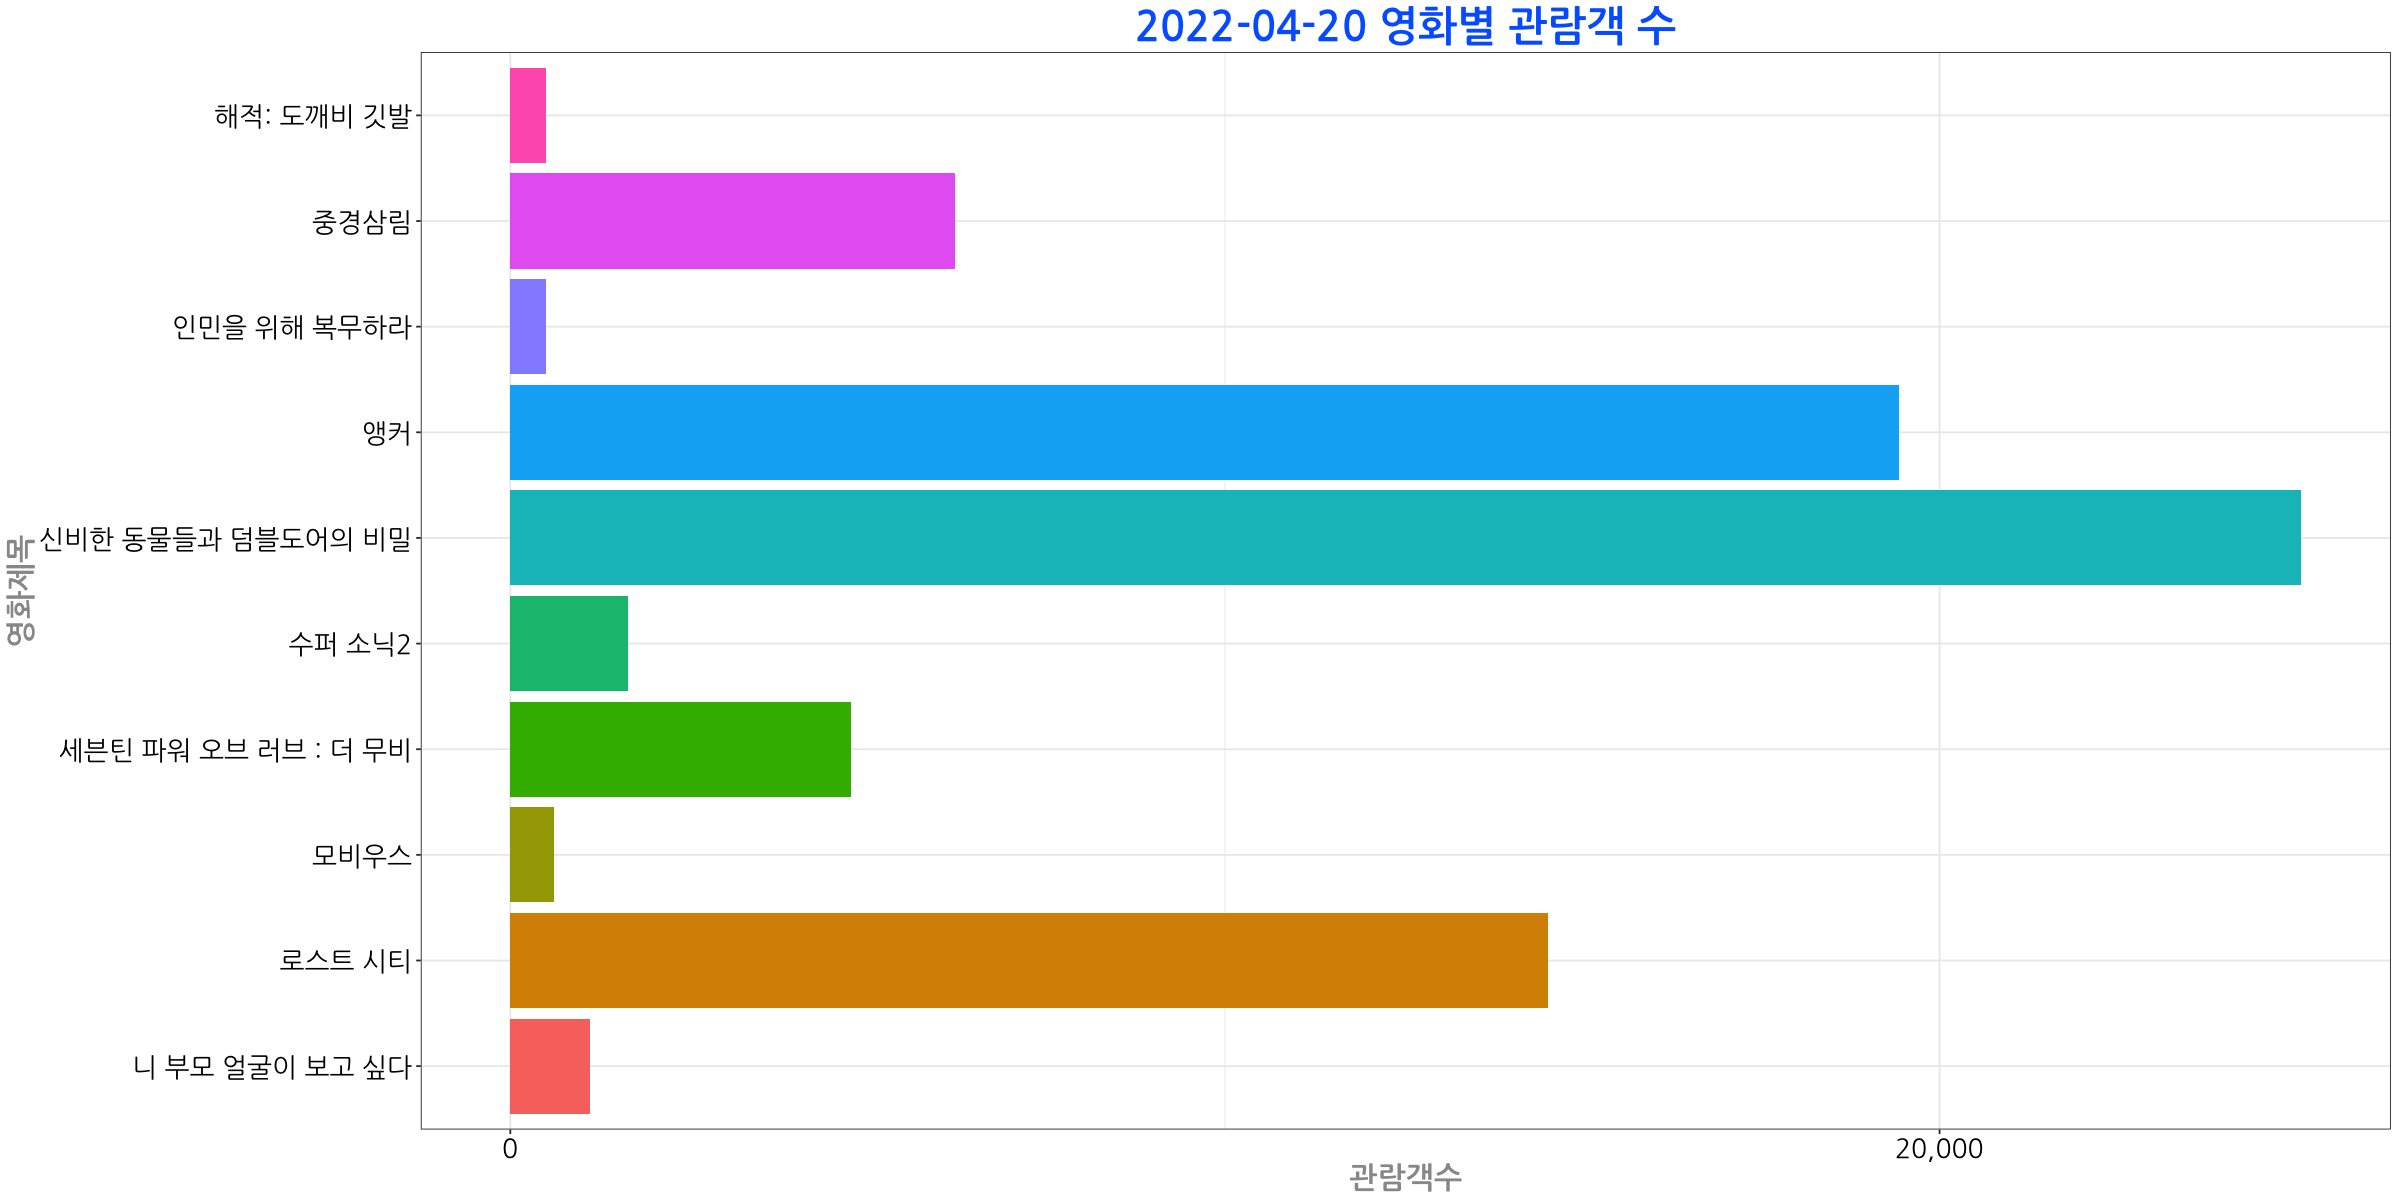

In [12]:
ggplot(data=movie_audience_df) +
    geom_col(aes(x=영화제목, y=관람객수, fill=영화제목)) +
    # 가로 막대 그래프로 설정
    coord_flip() +
    # 배경을 흰색으로 설정
    theme_bw() +
    # 그래프 타이틀 설정
    ggtitle(sprintf("%s 영화별 관람객 수", yesterday)) +
    # x축 제목 설정
    xlab("영화제목") +
    # y축 제목 설정
    ylab("관람객수") +
    # y축 값의 간격 및 세자리마다 콤마 적용
    scale_y_continuous(breaks=seq(0, max(movie_audience_df$관람객수), 20000), labels=scales::comma) +
    # 각 텍스트의 색상, 크기, 각도, 글꼴 설정
    theme(plot.title=element_text(family="NanumGothic", color="#0066ff", size=25, face="bold", hjust=0.5),
          axis.title.x=element_text(family="NanumGothic", color="#999999", size=18, face="bold"),
          axis.title.y=element_text(family="NanumGothic", color="#999999", size=18, face="bold"),
          axis.text.x=element_text(family="NanumGothic", color="#000000", size=16, angle=0),
          axis.text.y=element_text(family="NanumGothic", color="#000000", size=16, angle=0)) +
    # 범례 지우기
    theme(legend.position = "none")